In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('train.csv')
df

,ID,date,campaign_type,region,customer_age_range,gender,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%)
0,Kq6531,2/19/2019,Online Advertising,East,56+,Male,100735.32,64.0,2364.0,0.13,0.13,92.2
1,Zh5785,4/8/2019,Online Advertising,North,56+,Female,15722.29,77.0,684.0,0.24,0.13,72.6
2,Si1260,6/28/2018,TV,NaN,26-35,NaN,35385.73,1.0,2299.0,0.51,0.08,55.0
3,Hl5016,6/10/2019,NaN,West,NaN,NaN,116045.50,44.0,2332.0,0.97,0.09,68.0
4,Dj9025,7/14/2018,Email,East,36-45,NaN,65039.93,20.0,2564.0,0.36,0.26,50.8
...,...,...,...,...,...,...,...,...,...,...,...,...
11993,Kk3455,7/26/2018,TV,East,46-55,NaN,79508.92,80.0,2203.0,1.29,0.27,55.4
11994,Yd3578,9/27/2021,Direct Advertising,East,NaN,Others,102306.08,52.0,2386.0,0.41,0.05,70.4
11995,Ao1925,6/1/2019,Direct Advertising,NaN,NaN,Male,117407.35,65.0,2511.0,0.64,0.25,70.0
11996,Vf8403,7/21/2020,NaN,East,46-55,Male,4728.01,59.0,2736.0,0.08,0.08,30.0


Checking date formats

In [3]:
df['date'] = pd.to_datetime(df['date'])

Correcting typographical errors

In [4]:
print(df["gender"].unique())

['Male' 'Female' nan 'Others']


In [5]:
print(df["region"].unique())

['East' 'North' nan 'West' 'South']


In [6]:
print(df["campaign_type"].unique())

['Online Advertising' 'TV' nan 'Email' 'Social Networks'
 'Direct Advertising']


In [7]:
print(df["customer_age_range"].unique())

['56+' '26-35' nan '36-45' '18-25' '46-55']


Dealing with outliers

In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['sales', 'units_sold', 'clients_engaged', 'click_rate',
       'conversion_rate', 'satisfaction_client (%)'],
      dtype='object')


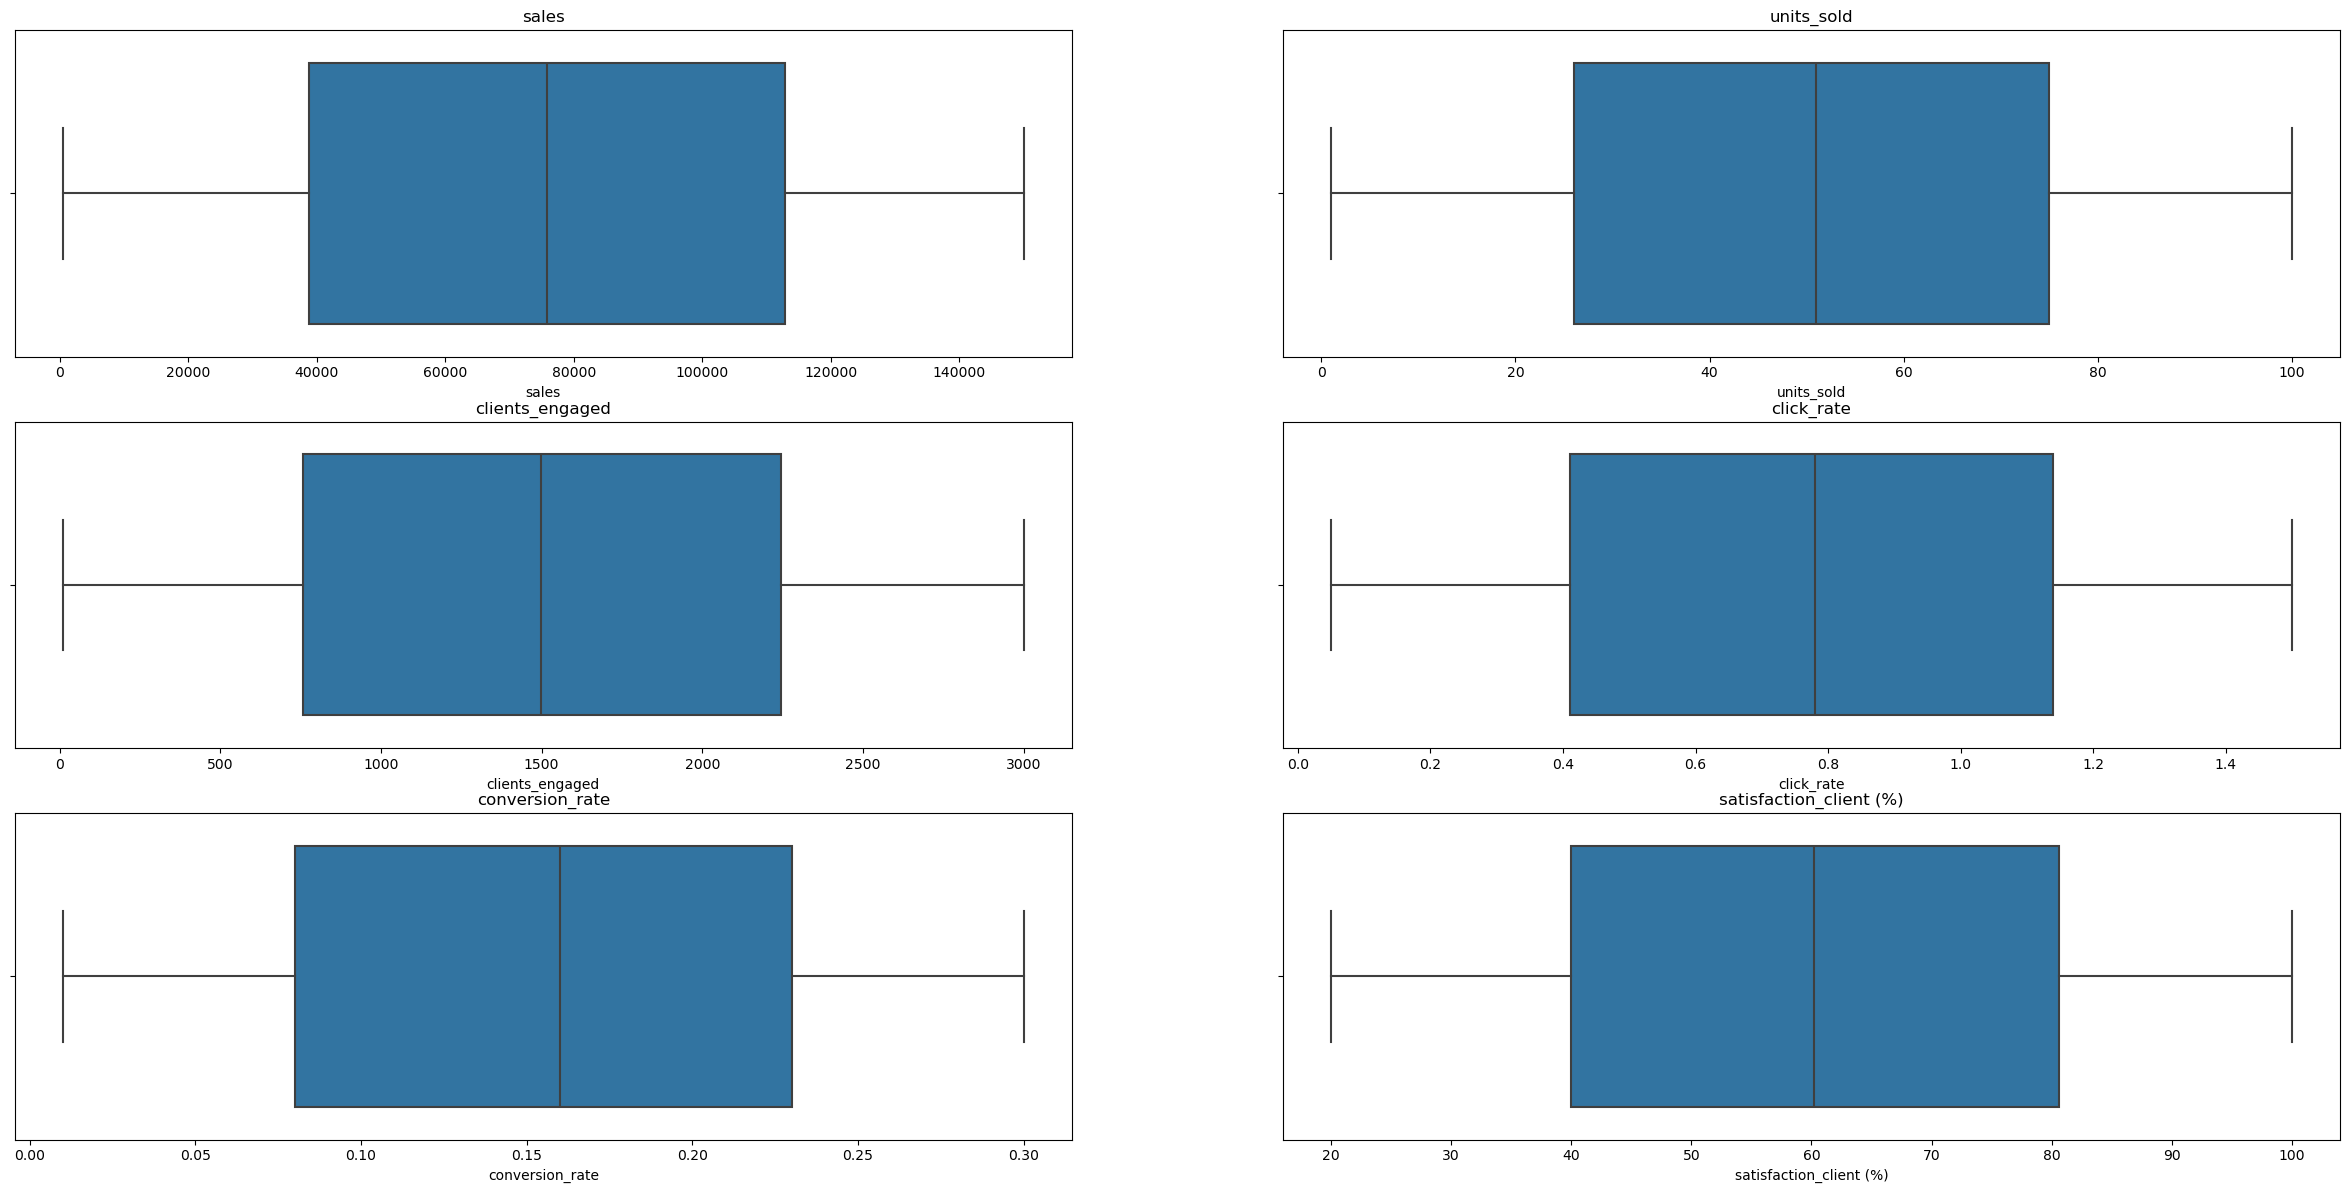

In [30]:
plt.figure(figsize=(30,50))
plotnumber =1
for col in numeric_columns:
    plt.subplot(10,2,plotnumber)
    sns.boxplot(x=df[col])
    plotnumber+=1
    plt.title(col)
plt.show()

As we can see through the box plot there are no outliers in any of the columns

In [10]:
print(numeric_columns)

Index(['sales', 'units_sold', 'clients_engaged', 'click_rate',
       'conversion_rate', 'satisfaction_client (%)'],
      dtype='object')


In [11]:
dictOfCols = {
    'sales': 'sum',
    'units_sold': 'sum',
    'clients_engaged': 'sum',
    'click_rate': 'mean',
    'conversion_rate': 'mean',
    "satisfaction_client (%)": 'mean'
}

In [12]:
# summary statistics
def summaryStatistics(df, listOfCols, dictOfCols):
    print("Summary Statistics")
    # we group by the columns and aggregate the statistics
    stats = df.groupby(listOfCols).agg(dictOfCols).reset_index()
    # some key performance indicators 
    stats['average_sales_per_client'] = stats['sales'] / stats['clients_engaged']
    stats['average_sales_per_unit'] = stats['sales'] / stats['units_sold']
    return stats


In [35]:
# 
campaign_type_and_region = summaryStatistics(df, ['campaign_type', 'region'], dictOfCols)
campaign_type_and_region.describe()


Summary Statistics


,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%),average_sales_per_client,average_sales_per_unit,average_units_sold
count,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.048018e+07,20532.150000,606581.100000,0.778329,0.155426,59.944044,50.289305,1484.775009,0.033883
std,1.775495e+06,915.841878,31838.789087,0.027209,0.004021,1.298988,2.337501,61.295756,0.001227
min,2.799344e+07,19146.000000,540092.000000,0.721228,0.147684,57.769951,46.139516,1408.531259,0.032005
25%,2.913802e+07,19877.000000,587382.000000,0.759954,0.153360,58.909362,48.278002,1433.142431,0.033306
50%,3.040316e+07,20523.500000,605756.500000,0.773141,0.155335,60.039633,50.565767,1470.649900,0.033829
75%,3.138034e+07,20930.000000,625290.500000,0.792785,0.157563,60.994170,51.945450,1501.355226,0.034657
max,3.583212e+07,22286.000000,661484.000000,0.831054,0.165976,62.362907,54.205683,1611.179690,0.035895


Summary Statistics


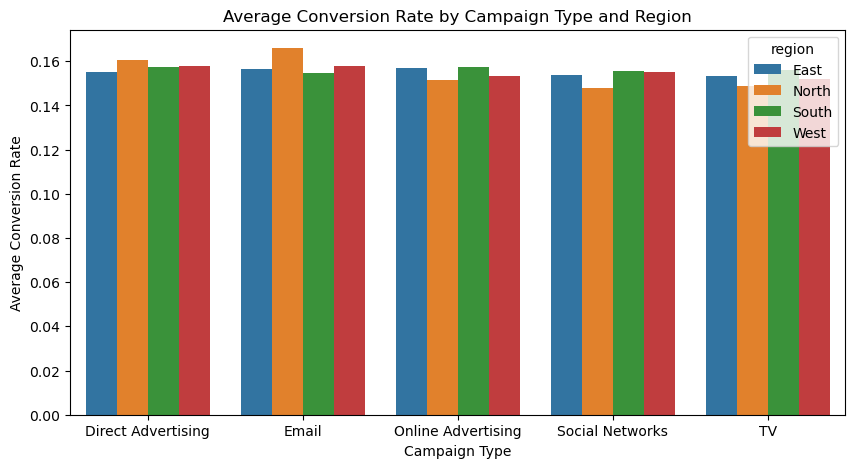

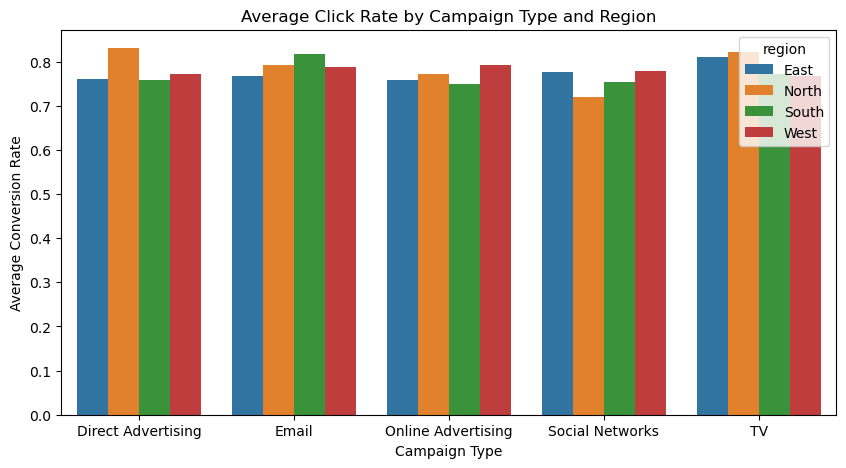

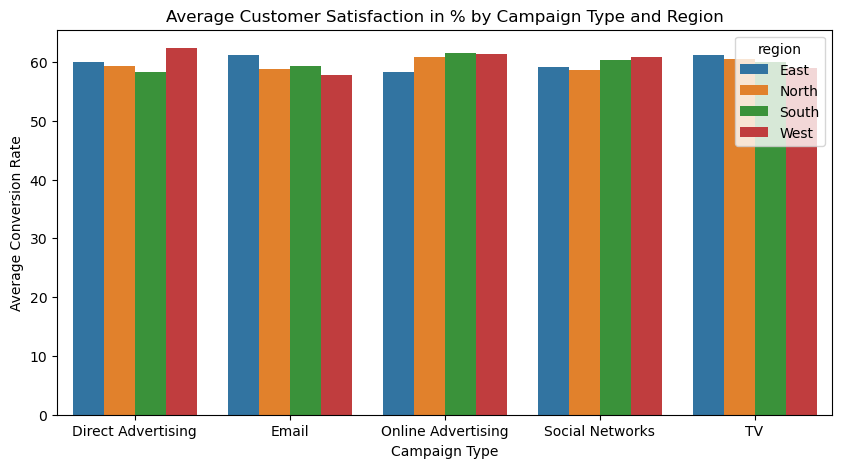

In [32]:
def plot(data, x, y, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=x, y=y, hue=hue, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
# conversion rate by campaign type and region
plot(campaign_type_and_region, 'campaign_type', 'conversion_rate', 'region', 'Average Conversion Rate by Campaign Type and Region', 'Campaign Type', 'Average Conversion Rate')
# click rate by campaign type and region
plot(campaign_type_and_region, 'campaign_type', 'click_rate', 'region', 'Average Click Rate by Campaign Type and Region', 'Campaign Type', 'Average Conversion Rate')
# satisfaction by campaign type and region
plot(campaign_type_and_region, 'campaign_type', 'satisfaction_client (%)', 'region', 'Average Customer Satisfaction in % by Campaign Type and Region', 'Campaign Type', 'Average Conversion Rate')


In [36]:
compaign_type_plot = summaryStatistics(df, ['campaign_type'], dictOfCols)
compaign_type_plot.describe()

Summary Statistics


,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%),average_sales_per_client,average_sales_per_unit,average_units_sold
count,5.000000e+00,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.519001e+08,101557.400000,3.010842e+06,0.779184,0.155987,59.986225,50.468042,1495.628799,0.033744
std,3.098353e+06,1513.549239,8.126160e+04,0.009166,0.002186,0.413592,1.153377,11.838006,0.000725
min,1.482023e+08,99401.000000,2.887816e+06,0.766530,0.152913,59.414220,48.977588,1484.571269,0.032960
25%,1.493746e+08,100618.000000,2.991171e+06,0.776504,0.155390,59.934444,49.546567,1485.958443,0.033231
50%,1.522632e+08,102195.000000,3.021161e+06,0.776640,0.155479,59.987506,51.009553,1490.953367,0.033826
75%,1.541081e+08,102468.000000,3.045230e+06,0.787017,0.157672,60.014103,51.080703,1507.980539,0.033858
max,1.555525e+08,103105.000000,3.108834e+06,0.789230,0.158480,60.580853,51.725800,1508.680375,0.034842


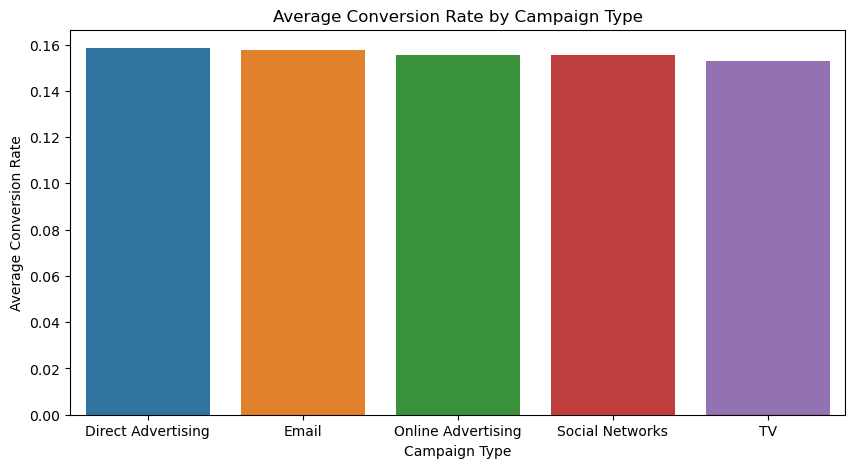

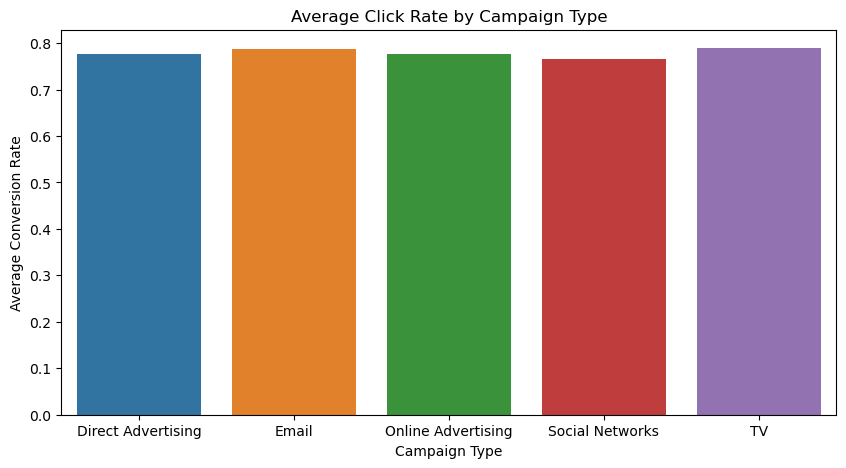

In [38]:
plot(compaign_type_plot, 'campaign_type', 'conversion_rate', None, 'Average Conversion Rate by Campaign Type', 'Campaign Type', 'Average Conversion Rate')
plot(compaign_type_plot, 'campaign_type', 'click_rate', None, 'Average Click Rate by Campaign Type', 'Campaign Type', 'Average Conversion Rate')

In [39]:
region_plot = summaryStatistics(df, ['region'], dictOfCols)
region_plot.describe()

Summary Statistics


,sales,units_sold,clients_engaged,click_rate,conversion_rate,satisfaction_client (%),average_sales_per_client,average_sales_per_unit,average_units_sold
count,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1.814243e+08,122114.500000,3.605887e+06,0.777711,0.155520,60.120281,50.317089,1485.938850,0.033864
std,3.280359e+06,2549.931306,3.688587e+04,0.003069,0.000644,0.311448,1.030143,26.988165,0.000509
min,1.795653e+08,119044.000000,3.575143e+06,0.775278,0.155016,59.764235,49.214064,1448.045130,0.033198
25%,1.797124e+08,120505.000000,3.583214e+06,0.775679,0.155042,59.946030,49.860004,1476.308280,0.033681
50%,1.798977e+08,122542.500000,3.595112e+06,0.776765,0.155337,60.109283,50.178103,1493.657812,0.033915
75%,1.816096e+08,124152.000000,3.617784e+06,0.778797,0.155816,60.283534,50.635188,1503.288382,0.034097
max,1.863363e+08,124329.000000,3.658182e+06,0.782038,0.156390,60.498321,51.698088,1508.394645,0.034429


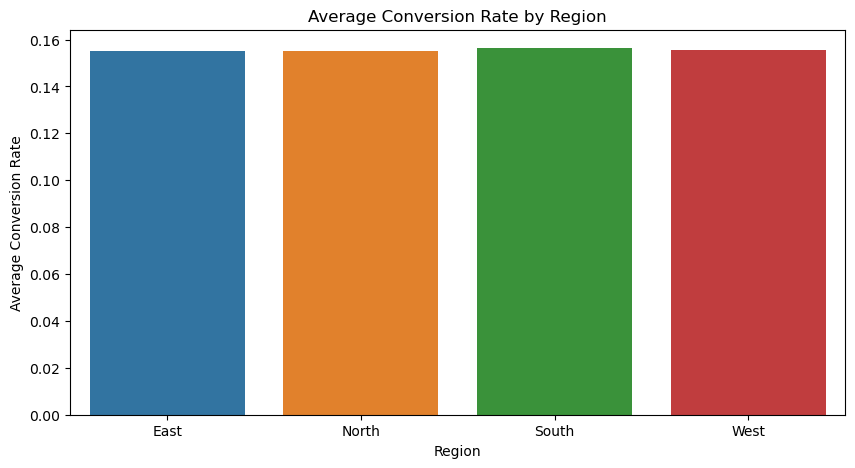

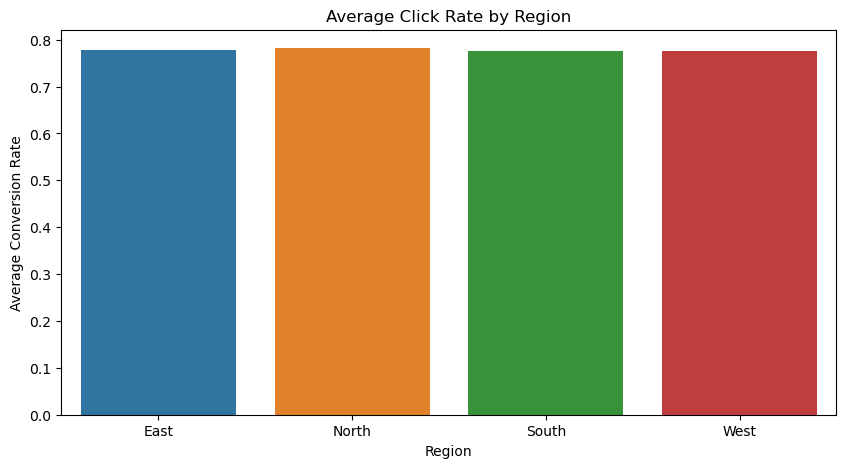

In [40]:
plot(region_plot, 'region', 'conversion_rate', None, 'Average Conversion Rate by Region', 'Region', 'Average Conversion Rate')
plot(region_plot, 'region', 'click_rate', None, 'Average Click Rate by Region', 'Region', 'Average Conversion Rate')    


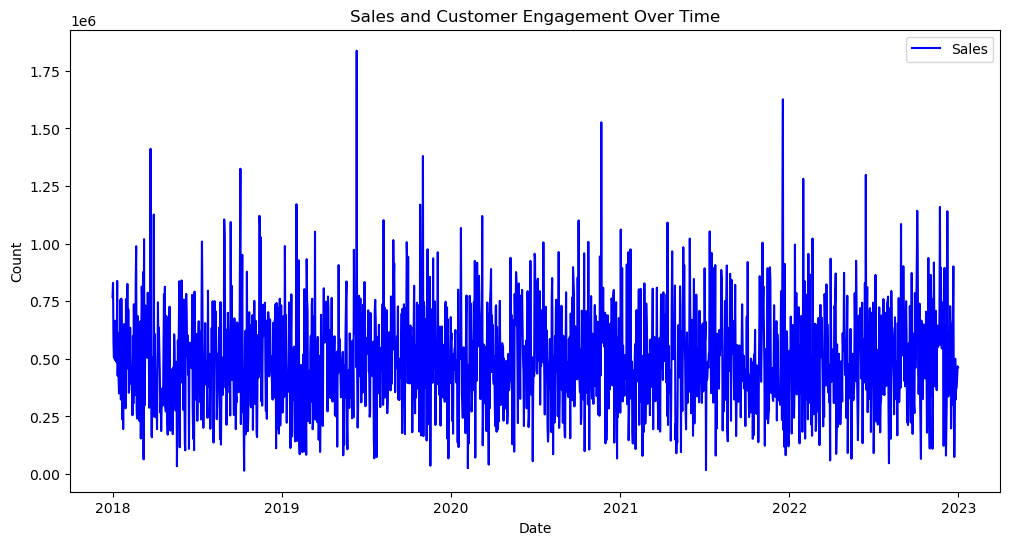

In [33]:
df.sort_values(by='date', inplace=True)
time_series_data = df.groupby('date').agg({'sales': 'sum', 'clients_engaged': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
# plot sales over time
plt.plot(time_series_data['date'], time_series_data['sales'], label='Sales', color='blue')

# Add labels and title
plt.title('Sales and Customer Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

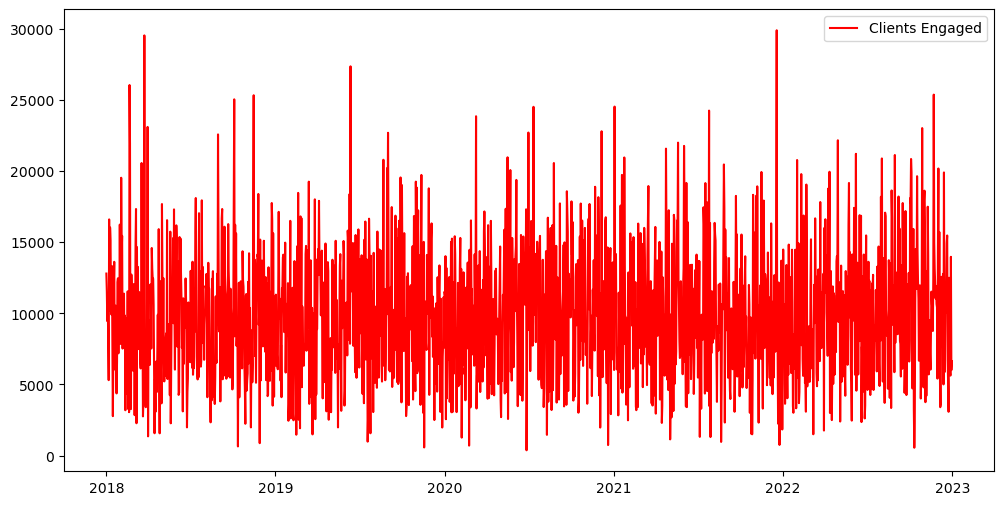

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['date'], time_series_data['clients_engaged'], label='Clients Engaged', color='red')
plt.legend()
plt.show()